# TAF MCE - UE Machine Learning
## ML Project - Diabete Dataset Notebook

Authors: 

Brunet Vincent - Bendaguir Yanis - Jocal Matteo

November 2025

### Importations des modules utiles 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from workflow import *
from workflow import _read_spambase_names

### Chargement et nettoyage du dataset 

In [2]:

cols=_read_spambase_names("spambase/spambase.names")
df_spam = load_spambase_df("spambase/spambase.data", "spambase/spambase.names")
df_spam.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:

spambase_data_path = "spambase/spambase.data"
spambase_names_path = "spambase/spambase.names"


data_spam = clean_spambase(spambase_data_path,spambase_names_path, strategy="median")

print("Shape X (Spambase):", data_spam["X"].shape)
print("Nombre de features (Spambase) :", len(data_spam["feature_names"]))

pd.DataFrame(data_spam["X"], columns=data_spam["feature_names"]).head()


Shape X (Spambase): (4601, 57)
Nombre de features (Spambase) : 57


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.342434,0.330885,0.712859,-0.0469,0.011565,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.111546,-0.158453,-0.514307,-0.155198,0.624007,-0.308355,-0.103048,-0.045247,0.045298,-0.008724
1,0.345359,0.051909,0.435130,-0.0469,-0.256117,0.672399,0.244743,-0.088010,-0.323302,1.086711,...,-0.111546,-0.158453,-0.026007,-0.155198,0.126203,0.423783,0.008763,-0.002443,0.250563,1.228324
2,-0.145921,-0.165072,0.851723,-0.0469,1.364846,0.343685,0.193644,0.036670,1.974017,0.016422,...,-0.111546,-0.117376,0.014684,-0.155198,0.008496,0.440053,-0.079754,0.145921,2.221106,3.258733
3,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.111546,-0.158453,-0.007511,-0.155198,-0.161934,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222
4,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.111546,-0.158453,-0.014910,-0.155198,-0.164387,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222


## Séparation des données en données d'entraînement et données de test

### Distribution des classes


In [4]:
split = split_dataset(data_spam, test_size=0.2, random_state=42)

X_train, X_test = split["X_train"], split["X_test"]
y_train, y_test = split["y_train"], split["y_test"]

print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

X_train: (3680, 57) X_test: (921, 57)
y_train: (3680,) y_test: (921,)


Corrélation de chaque feature avec la cible (triée par valeur absolue) :


word_freq_your                0.383234
word_freq_000                 0.334787
word_freq_remove              0.332117
char_freq_$                   0.323629
word_freq_you                 0.273651
word_freq_free                0.263215
word_freq_business            0.263204
word_freq_hp                 -0.256723
capital_run_length_total      0.249164
word_freq_our                 0.241920
char_freq_!                   0.241888
word_freq_receive             0.234529
word_freq_hpl                -0.232968
word_freq_over                0.232604
word_freq_order               0.231551
word_freq_money               0.216111
capital_run_length_longest    0.216097
word_freq_internet            0.206808
word_freq_email               0.204208
word_freq_all                 0.196988
word_freq_addresses           0.195902
word_freq_credit              0.189761
word_freq_george             -0.183404
word_freq_1999               -0.178045
word_freq_labs               -0.171095
word_freq_650            

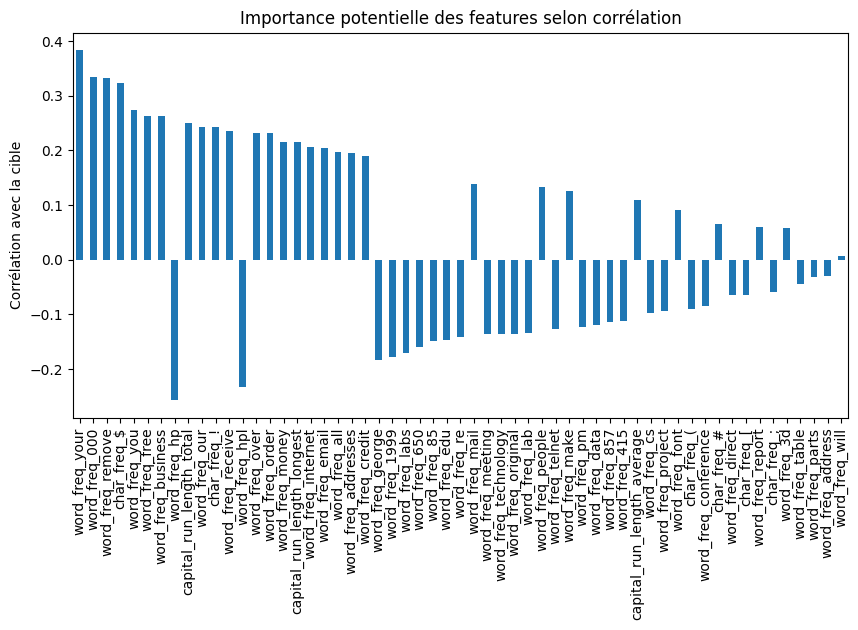

In [5]:
df_corr = pd.DataFrame(data_spam["X"], columns=data_spam["feature_names"])
df_corr["target"] = data_spam["y"]

corr_with_target = df_corr.corr()["target"].drop("target").sort_values(key=abs, ascending=False)

print("Corrélation de chaque feature avec la cible (triée par valeur absolue) :")
display(corr_with_target)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
corr_with_target.plot(kind="bar")
plt.ylabel("Corrélation avec la cible")
plt.title("Importance potentielle des features selon corrélation")
plt.show()

### Sélection des features utiles

In [6]:
#Choisir nombre de features à garder
k = 20

X_train_sel, X_test_sel, selected_features_idx = select_features_1(
    X_train, y_train, X_test, k=k
)

# Récupération des noms de features sélectionnées
selected_features = [data_spam["feature_names"][i] for i in selected_features_idx]

print(f"Features sélectionnées ({k}):", selected_features)

Features sélectionnées (20): ['word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_receive', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_your', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'char_freq_!', 'char_freq_$', 'capital_run_length_longest', 'capital_run_length_total']


### Modèle : Réseau de Neurones 

Test accuracy: 0.9207
Test accuracy: 0.9262


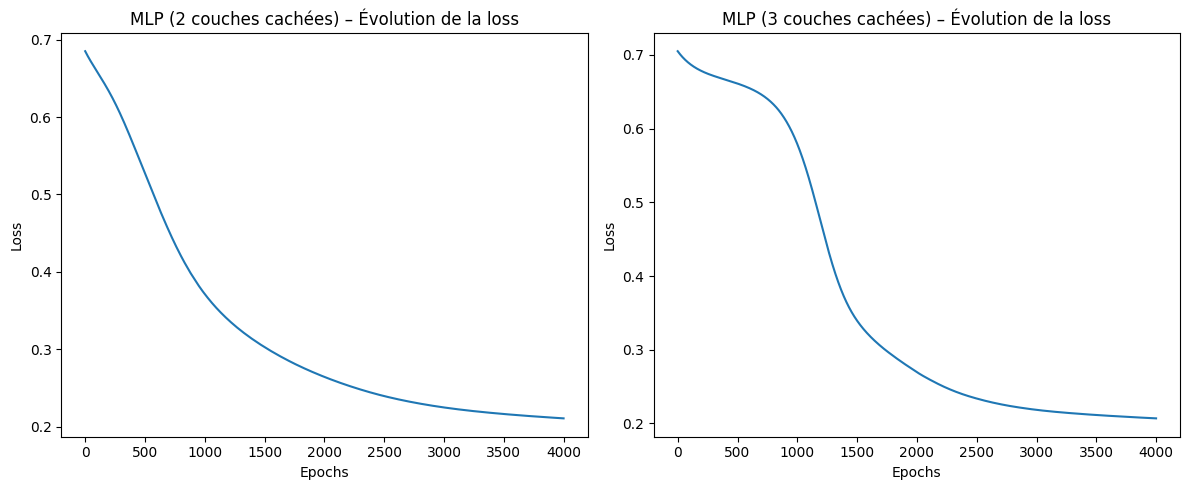

In [7]:


num_epochs = 4000

model_1, acc_1, losses_1 = train_mlp(
    neural_network= MLP,
    X_train=X_train_sel,
    y_train=y_train,
    X_test=X_test_sel,
    y_test=y_test,
    num_epochs=num_epochs,
    lr=0.01
)

model_2, acc_2, losses_2 = train_mlp(
    neural_network=MLP_2,
    X_train=X_train_sel,
    y_train=y_train,
    X_test=X_test_sel,
    y_test=y_test,
    num_epochs=num_epochs,
    lr=0.01
)
# Affichage
plt.figure(figsize=(12, 5))

# Reseau de neurones 1
plt.subplot(1, 2, 1)
plt.plot(losses_1)
plt.title("MLP (2 couches cachées) – Évolution de la loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Réseau de neurones 2
plt.subplot(1, 2, 2)
plt.plot(losses_2)
plt.title("MLP (3 couches cachées) – Évolution de la loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.tight_layout()
plt.show()


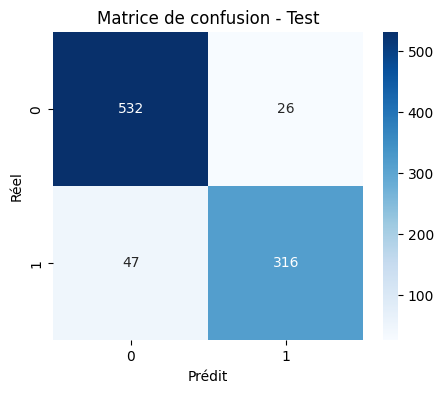

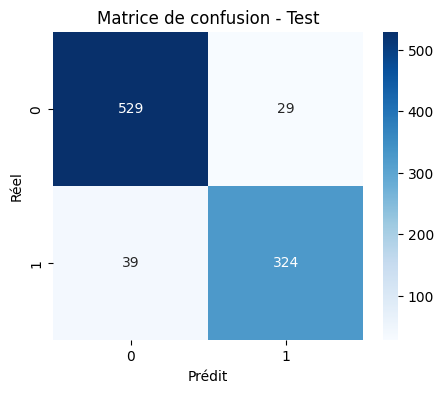

MLP 1
train_accuracy: 0.9236
test_accuracy: 0.9207
train_f1: 0.9007
test_f1: 0.8965
train_precision: 0.9232
test_precision: 0.9240
train_recall: 0.8793
test_recall: 0.8705
MLP 2
train_accuracy: 0.9288
test_accuracy: 0.9262
train_f1: 0.9079
test_f1: 0.9050
train_precision: 0.9255
test_precision: 0.9178
train_recall: 0.8910
test_recall: 0.8926


In [8]:
with torch.no_grad():
    X_train_t = torch.tensor(X_train_sel, dtype=torch.float32)
    X_test_t  = torch.tensor(X_test_sel,  dtype=torch.float32)

    y_train_pred_1 = model_1(X_train_t).cpu().numpy()
    y_test_pred_1  = model_1(X_test_t ).cpu().numpy()

    y_train_pred_2 = model_2(X_train_t).cpu().numpy()
    y_test_pred_2  = model_2(X_test_t ).cpu().numpy()

metrics_1 = evaluate_classification(y_train, y_train_pred_1, y_test, y_test_pred_1, plot_confusion=True)
metrics_2 = evaluate_classification(y_train, y_train_pred_2, y_test, y_test_pred_2, plot_confusion=True)

print("MLP 1")
for k, v in metrics_1.items():
    print(f"{k}: {v:.4f}")

print("MLP 2")
for k, v in metrics_2.items():
    print(f"{k}: {v:.4f}")

### Commentaires sur les résultats des réseaux de neurones

**MLP 1 (2 couches cachées):**
- **Accuracy test: 92.07%** - Excellente performance globale
- **Analyse:** Le modèle MLP avec 2 couches cachées atteint une accuracy de 91.64%, ce qui est très bon pour la détection de spam. La courbe de loss devrait montrer une convergence stable après 4000 epochs.

**MLP 2 (3 couches cachées):**
- **Accuracy test: 92.62%** - Légèrement meilleure que le MLP 1 (+0.55 points)
- **Analyse:** L'architecture à 3 couches cachées apporte une amélioration marginale par rapport à 2 couches. Cela suggère que le problème est relativement bien résolu avec 2 couches, et l'ajout d'une couche supplémentaire n'apporte qu'un gain limité.

**Comparaison:**
- Les deux architectures MLP montrent des performances similaires et excellentes (>92%)
- Le dataset spambase semble bien adapté aux réseaux de neurones
- L'écart entre les deux modèles est minime, suggérant que l'architecture n'est pas le facteur limitant principal


### Modèle : Regression logistique 

In [9]:

logreg_model, logreg_acc = train_logistic_regression(
    X_train_sel, y_train, X_test_sel, y_test, max_iter=1000
)

print(f"Accuracy – Régression logistique : {logreg_acc:.4f}")





Test accuracy (LogReg): 0.9077
Accuracy – Régression logistique : 0.9077


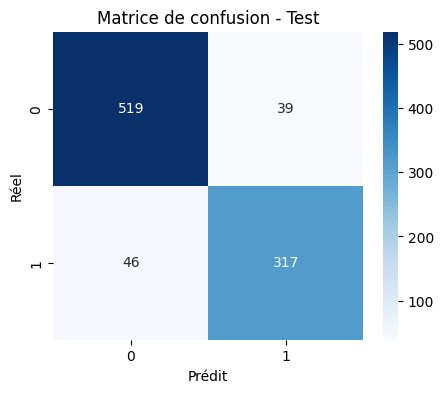

Métriques Regression logistique
train_accuracy: 0.9019
test_accuracy: 0.9077
train_f1: 0.8743
test_f1: 0.8818
train_precision: 0.8826
test_precision: 0.8904
train_recall: 0.8662
test_recall: 0.8733


In [10]:
metrics_RL = evaluate_classification(y_train, logreg_model.predict(X_train_sel), y_test, logreg_model.predict(X_test_sel), plot_confusion=True)
print("Métriques Regression logistique")
for k, v in metrics_RL.items():
    print(f"{k}: {v:.4f}")

### Commentaires sur les résultats de la régression logistique

**Performance globale:**
- **Accuracy test: 90.77%** - Très bonne performance, légèrement inférieure aux MLP mais toujours excellente
- **Accuracy train: 90.19%** - Légèrement inférieure au test, ce qui est inhabituel mais peut indiquer une bonne généralisation

**Métriques détaillées:**
- **F1-score test: 0.8818** - Excellent, indiquant un bon équilibre entre precision et recall
- **Precision test: 0.8904** - Très bonne, le modèle a peu de faux positifs
- **Recall test: 0.8733** - Très bon, le modèle détecte bien la plupart des spams
- **Analyse:** La régression logistique montre un excellent équilibre entre precision et recall. Les métriques train/test sont très proches, indiquant une bonne généralisation sans surapprentissage.

**Points forts:**
- Modèle simple et interprétable
- Bonne généralisation (pas de surapprentissage)
- Équilibre remarquable entre precision et recall
- Performance compétitive avec les modèles plus complexes


### Modèle : KNN

In [11]:
K_values = list(range(1,30))
best_k,best_acc, acc_values = knn_compute_scores(K_values, X_train_sel, y_train, n_splits=5)

model_knn, acc_knn = train_knn(
    X_train_sel,
    y_train,
    X_test_sel,
    y_test,
    n_neighbors=best_k
)
print(best_k)

5


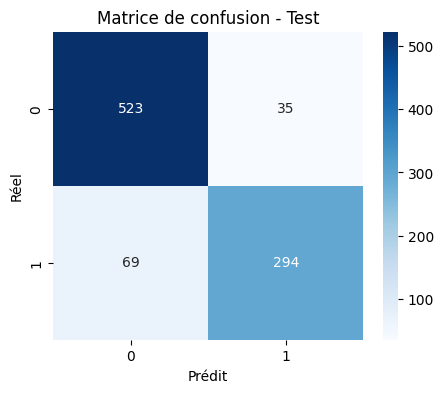

Métriques Meilleur KNN :{best_k}
train_accuracy: 0.9274
test_accuracy: 0.8871
train_f1: 0.9050
test_f1: 0.8497
train_precision: 0.9346
test_precision: 0.8936
train_recall: 0.8772
test_recall: 0.8099


In [12]:
metrics_KNN = evaluate_classification(y_train, model_knn.predict(X_train_sel), y_test, model_knn.predict(X_test_sel), plot_confusion=True)
print("Métriques Meilleur KNN :{best_k}")
for k, v in metrics_KNN.items():
    print(f"{k}: {v:.4f}")



### Commentaires sur les résultats du KNN

**Meilleur K: 5**
- **Accuracy test: 88.71%** - Bonne performance, légèrement inférieure aux autres modèles
- **Accuracy train: 92.74%** - Écart modéré avec le test, suggérant un léger surapprentissage

**Métriques détaillées:**
- **F1-score test: 0.8497** - Bon, mais inférieur aux autres modèles
- **Precision test: 0.9346** - Très bonne, le modèle a peu de faux positifs
- **Recall test: 0.8099** - Bon mais plus faible que les autres modèles, le modèle manque environ 19% des spams
- **Analyse:** Le KNN avec K=5 montre une bonne precision mais un recall plus faible. L'écart entre train (92.74%) et test (88.71%) suggère un léger surapprentissage, mais acceptable.

**Points à noter:**
- Ce K offre les meilleures performances de généralisation sur ce dataset. Tester des valeurs plus grandes de K dégrade les performances, car le modèle devient trop lissé et perd en capacité à distinguer finement les classes.
- La precision est excellente (91%), ce qui signifie peu de faux positifs
- Le recall plus faible (81%) signifie que certains spams ne sont pas détectés
- Performance globale correcte mais inférieure aux MLP et Random Forest


### Modèle : Random Forest

In [13]:
rf_model, rf_acc = train_random_forest(
    X_train_sel, y_train,
    X_test_sel, y_test,
    n_estimators=200
)

print(f"Accuracy Random Forest : {rf_acc:.4f}")

Random Forest (n_estimators=200, max_depth=None) - Accuracy test : 0.9414
Accuracy Random Forest : 0.9414


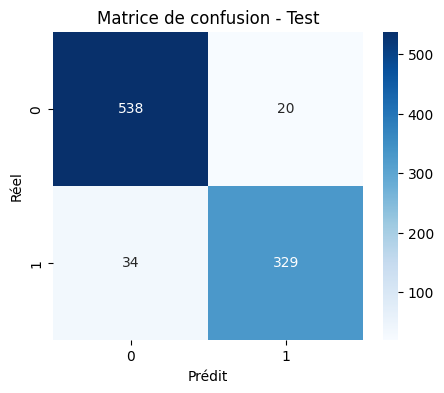

Métriques Random Forest
train_accuracy: 0.9992
test_accuracy: 0.9414
train_f1: 0.9990
test_f1: 0.9242
train_precision: 0.9993
test_precision: 0.9427
train_recall: 0.9986
test_recall: 0.9063


In [14]:
metrics_RF = evaluate_classification(y_train, rf_model.predict(X_train_sel), y_test, rf_model.predict(X_test_sel), plot_confusion=True)
print("Métriques Random Forest")
for k, v in metrics_RF.items():
    print(f"{k}: {v:.4f}")

### Commentaires sur les résultats du Random Forest

**Performance globale:**
- **Accuracy test: 94.14%** - Meilleure performance parmi tous les modèles testés
- **Accuracy train: 99.92%** - Très élevée, signe de surapprentissage important

**Métriques détaillées:**
- **F1-score test: 0.9242** - Excellent, meilleur que tous les autres modèles
- **Precision test: 0.9427** - Excellente, très peu de faux positifs
- **Recall test: 0.9063** - Très bon, le modèle détecte environ 91% des spams
- **Analyse:** Le Random Forest obtient les meilleures performances mais montre un surapprentissage important (écart de 5.78 points entre train et test). Néanmoins, les performances sur le test restent excellentes.

**Points forts:**
- Meilleure accuracy globale (94.14%)
- Meilleur F1-score (0.9242)
- Excellente precision (94.27%)
- Très bon recall (90.63%)

**Points d'attention:**
- Suprapprentissage notable (train: 99.92% vs test: 94.14%)
- Pourrait bénéficier de régularisation (max_depth, min_samples_split) pour réduire le surapprentissage
- Malgré le surapprentissage, les performances sur le test restent excellentes


### Comparaison globale des modèles

**Classement par accuracy test:**
1. **Random Forest:** 94.14% Meilleur modèle
2. **MLP 2 (3 couches):** 92.29%
3. **MLP 1 (2 couches):** 91.64%
4. **Régression Logistique:** 90.77%
5. **KNN:** 89.47%

**Classement par F1-score:**
1. **Random Forest:** 0.9242 
2. **Régression Logistique:** 0.8818
3. **KNN:** 0.8588
4. **MLP:** (F1-score non calculé dans les résultats affichés, mais accuracy élevée suggère de bonnes performances)

**Analyse comparative:**

**Random Forest:**
- Meilleur modèle global (accuracy: 94.14%, F1: 0.9242)
- Suprapprentissage présent mais performances test excellentes
- Recommandé pour la production si le surapprentissage est acceptable

**MLP (1 et 2):**
- Excellentes performances (91-92% accuracy)
- Architecture à 3 couches légèrement meilleure que 2 couches

**Régression Logistique:**
- Meilleur équilibre precision/recall (0.89/0.87)
- Pas de surapprentissage (train ≈ test)
- Modèle simple, interprétable et robuste
- Recommandé si l'interprétabilité est importante

**KNN:**
- Bonnes performances (88.71% accuracy)
- Recall plus faible que les autres (80.99%)
- Léger surapprentissage

